# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [54]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 629


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_temp_max = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat,
                          "Lng": city_lng, 
                          "Max Temp": city_temp_max,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
   
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | margaret river
Processing Record 2 of Set 1 | new toronto
Processing Record 3 of Set 1 | spring creek
Processing Record 4 of Set 1 | zaozersk
Processing Record 5 of Set 1 | port elizabeth
Processing Record 6 of Set 1 | canoinhas
Processing Record 7 of Set 1 | taiohae
City not found. Skipping...
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | bodo
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | port macquarie
Processing Record 12 of Set 1 | nantucket
Processing Record 13 of Set 1 | west island
Processing Record 14 of Set 1 | nadym
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | ribeira grande
Processing Record 18 of Set 1 | vadso
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | tura
Processing Record 21 of Set 1 | mbuji-mayi
Process

Processing Record 39 of Set 4 | monduli
Processing Record 40 of Set 4 | susuman
Processing Record 41 of Set 4 | san jose village
City not found. Skipping...
Processing Record 42 of Set 4 | lazaro cardenas
Processing Record 43 of Set 4 | richards bay
Processing Record 44 of Set 4 | kailua-kona
Processing Record 45 of Set 4 | egilsstadir
Processing Record 46 of Set 4 | argo
Processing Record 47 of Set 4 | intendente alvear
Processing Record 48 of Set 4 | colonia
Processing Record 49 of Set 4 | jora
Processing Record 0 of Set 5 | alvear
Processing Record 1 of Set 5 | dubbo
Processing Record 2 of Set 5 | tucuma
Processing Record 3 of Set 5 | iguape
Processing Record 4 of Set 5 | tazovsky
Processing Record 5 of Set 5 | mata-utu
Processing Record 6 of Set 5 | lihue
Processing Record 7 of Set 5 | wailua homesteads
Processing Record 8 of Set 5 | sur
Processing Record 9 of Set 5 | luderitz
Processing Record 10 of Set 5 | hithadhoo
Processing Record 11 of Set 5 | bikenibeu village
Processing Rec

Processing Record 28 of Set 8 | buka
Processing Record 29 of Set 8 | vigan
Processing Record 30 of Set 8 | northam
Processing Record 31 of Set 8 | volksrust
Processing Record 32 of Set 8 | jiwani
Processing Record 33 of Set 8 | khandyga
Processing Record 34 of Set 8 | kingston
Processing Record 35 of Set 8 | north platte
Processing Record 36 of Set 8 | nasiriyah
Processing Record 37 of Set 8 | hofors
Processing Record 38 of Set 8 | 'ali al gharbi
Processing Record 39 of Set 8 | igarka
Processing Record 40 of Set 8 | seririt
Processing Record 41 of Set 8 | iwanai
Processing Record 42 of Set 8 | santo angelo
Processing Record 43 of Set 8 | khedbrahma
Processing Record 44 of Set 8 | larache
Processing Record 45 of Set 8 | meadow lake
Processing Record 46 of Set 8 | dudinka
Processing Record 47 of Set 8 | gushu
Processing Record 48 of Set 8 | ha tien
Processing Record 49 of Set 8 | mil'kovo
Processing Record 0 of Set 9 | biloela
Processing Record 1 of Set 9 | st. john's
Processing Record 2

Processing Record 22 of Set 12 | san mariano
Processing Record 23 of Set 12 | al wukayr
Processing Record 24 of Set 12 | westport
Processing Record 25 of Set 12 | bahia blanca
Processing Record 26 of Set 12 | laikit, laikit ii (dimembe)
Processing Record 27 of Set 12 | ciudad melchor muzquiz
Processing Record 28 of Set 12 | marabba
Processing Record 29 of Set 12 | neiafu
Processing Record 30 of Set 12 | barreiras
Processing Record 31 of Set 12 | pasuquin
Processing Record 32 of Set 12 | roxas
Processing Record 33 of Set 12 | greymouth
Processing Record 34 of Set 12 | tavira
Processing Record 35 of Set 12 | san pedro pochutla
Processing Record 36 of Set 12 | abepura
Processing Record 37 of Set 12 | rongelap
Processing Record 38 of Set 12 | igrim
Processing Record 39 of Set 12 | batyrevo
Processing Record 40 of Set 12 | hargeysa
Processing Record 41 of Set 12 | manta
Processing Record 42 of Set 12 | moree
Processing Record 43 of Set 12 | vernon
Processing Record 44 of Set 12 | shantobe
P

In [25]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          606
Lat           606
Lng           606
Max Temp      606
Humidity      606
Cloudiness    606
Wind Speed    606
Country       606
Date          606
dtype: int64

In [26]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,margaret river,-33.9500,115.0667,22.08,34,0,2.45,AU,1702172756
1,new toronto,43.6002,-79.5053,13.00,90,100,4.12,CA,1702172854
2,spring creek,40.7266,-115.5859,-3.17,50,44,1.42,US,1702172878
3,zaozersk,69.4005,32.4476,-16.58,94,48,4.75,RU,1702172772
4,port elizabeth,-33.9180,25.5701,14.50,88,0,3.60,ZA,1702172751


In [28]:
# Convert datetime to readable date format
city_data_df['Date']=(pd.to_datetime(city_data_df['Date'],unit='s')).dt.date
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,margaret river,-33.9500,115.0667,22.08,34,0,2.45,AU,2023-12-10
1,new toronto,43.6002,-79.5053,13.00,90,100,4.12,CA,2023-12-10
2,spring creek,40.7266,-115.5859,-3.17,50,44,1.42,US,2023-12-10
3,zaozersk,69.4005,32.4476,-16.58,94,48,4.75,RU,2023-12-10
4,port elizabeth,-33.9180,25.5701,14.50,88,0,3.60,ZA,2023-12-10


In [29]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [30]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,22.08,34,0,2.45,AU,2023-12-10
1,new toronto,43.6002,-79.5053,13.00,90,100,4.12,CA,2023-12-10
2,spring creek,40.7266,-115.5859,-3.17,50,44,1.42,US,2023-12-10
3,zaozersk,69.4005,32.4476,-16.58,94,48,4.75,RU,2023-12-10
4,port elizabeth,-33.9180,25.5701,14.50,88,0,3.60,ZA,2023-12-10


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

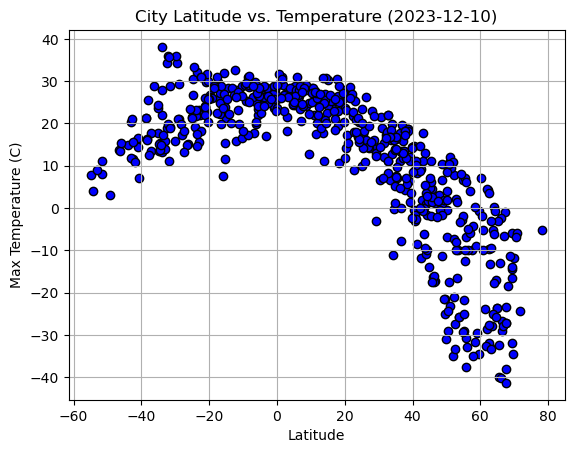

In [31]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()
date=city_data_df["Date"].min()
plt.title(f"City Latitude vs. Temperature ({date})")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

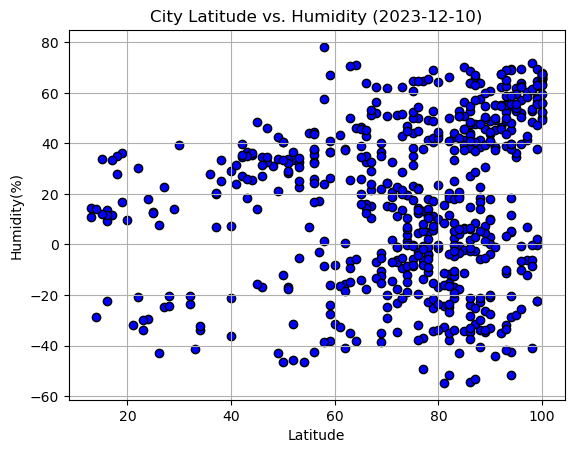

In [32]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Humidity"],city_data_df["Lat"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid()
date=city_data_df["Date"].min()
plt.title(f"City Latitude vs. Humidity ({date})")


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

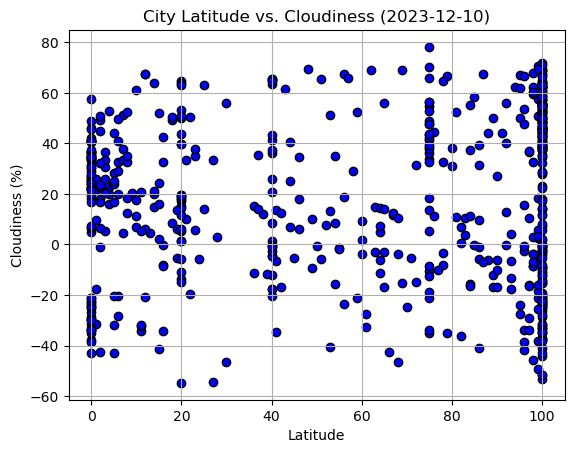

In [33]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Cloudiness"],city_data_df["Lat"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
date=city_data_df["Date"].min()
plt.title(f"City Latitude vs. Cloudiness ({date})")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

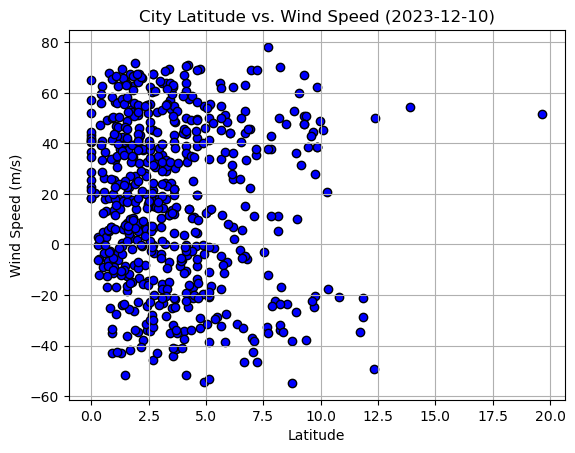

In [34]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Wind Speed"],city_data_df["Lat"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()
date=city_data_df["Date"].min()
plt.title(f"City Latitude vs. Wind Speed ({date})")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [52]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [49]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,new toronto,43.6002,-79.5053,13.00,90,100,4.12,CA,2023-12-10
2,spring creek,40.7266,-115.5859,-3.17,50,44,1.42,US,2023-12-10
3,zaozersk,69.4005,32.4476,-16.58,94,48,4.75,RU,2023-12-10
7,bodo,67.2800,14.4050,-0.98,59,100,9.26,NO,2023-12-10
10,nantucket,41.2835,-70.0995,9.06,97,0,5.14,US,2023-12-10


In [50]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,22.08,34,0,2.45,AU,2023-12-10
4,port elizabeth,-33.9180,25.5701,14.50,88,0,3.60,ZA,2023-12-10
5,canoinhas,-26.1772,-50.3900,15.25,89,100,1.85,BR,2023-12-10
6,edinburgh of the seven seas,-37.0676,-12.3116,13.58,77,100,6.99,SH,2023-12-10
8,puerto natales,-51.7236,-72.4875,8.02,94,100,1.46,CL,2023-12-10


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8445411799409969


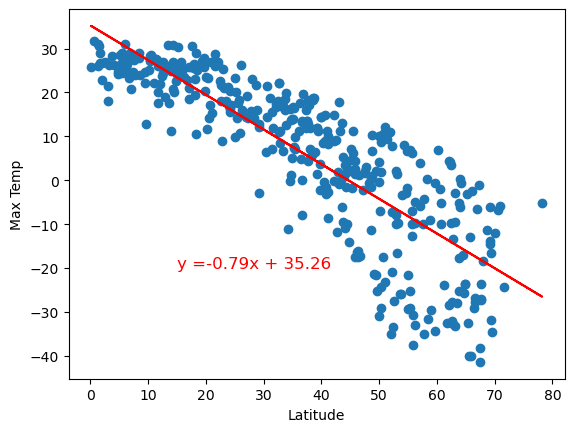

In [67]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (15, -20))

The r-value is: 0.5713503142336936


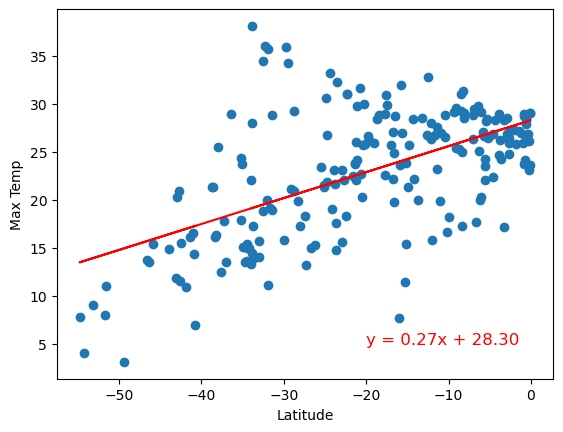

In [63]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-20, 5))

**Discussion about the linear relationship:** 

There is a strong negative correlation (r-value = -0.84) between the temperature and latitude in the northern hemisphere. The farther away from the equator, the lower the maximum temperature.

There is a fairly strong positive corrilation (r-value = 0.57) between the temperature and latitude in the southern hemisphere. Generally, the closer to the equatore (latitude 0) the higher the maximum temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.36943883875782757


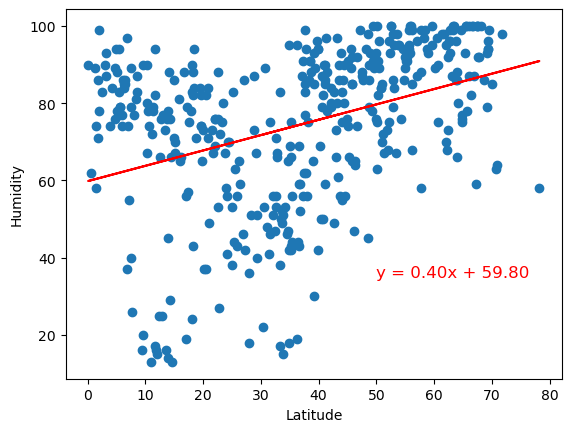

In [77]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"], (50, 35))

The r-value is: 0.15623623451383264


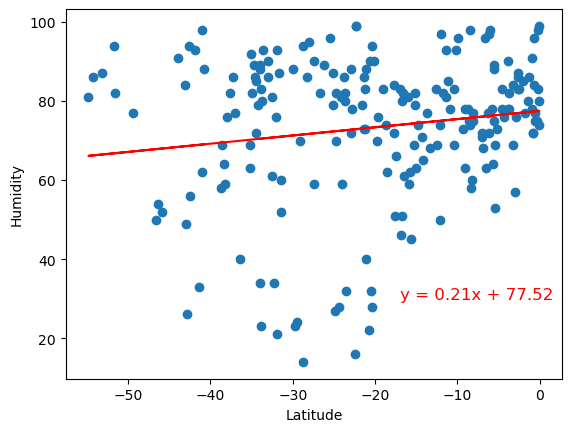

In [76]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity"], (-17, 30))

**Discussion about the linear relationship:** 

There is a slight positive correlation (r-value = 0.37) between latitude and humidity in the northern hemisphere. 

In the southern hemisphere, there is a very weak correlation (r-value = 0.15) between latitude and humidity. 

The data in both hemispheres is spread out and does not show a strong relationship between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.33852473421631724


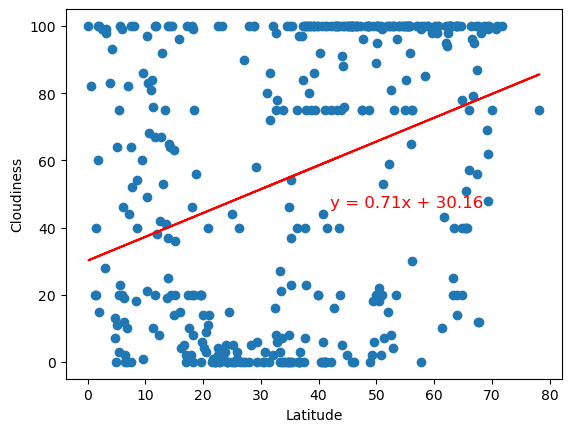

In [80]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"], (42, 46))

The r-value is: 0.13510369704913933


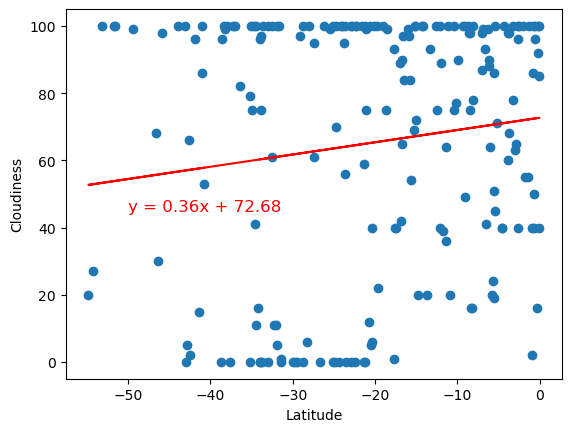

In [83]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-50, 45))

**Discussion about the linear relationship:** 

Based on the data available, there is little to no relationship between cloudiness and latitude in both hemispheres. The scatter plot shows the data very spread out and clumped at both ends of the cloudiness spectrum. 



### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.13768650032179888


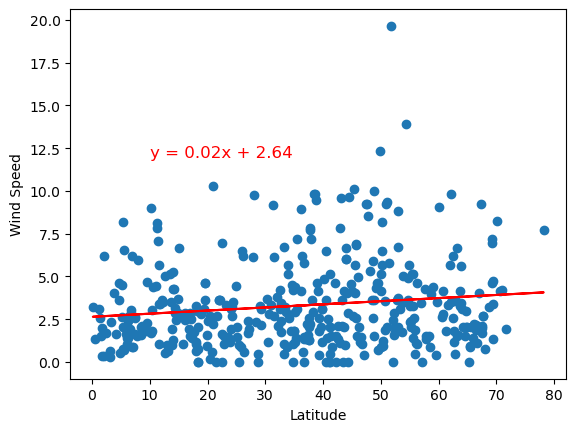

In [84]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"], (10, 12))

The r-value is: -0.2658291869599355


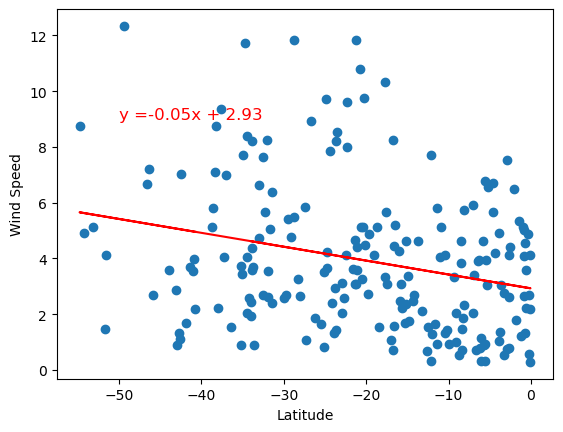

In [85]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (-50, 9))

**Discussion about the linear relationship:** 

Based on the data, there is little to no relationship between wind speed and latitude. The r-value is low for both the northern and southern hemispheres and the data points are scattered widely. 